# EDA

## Questions

- What are the most common risk factors?
- What’s the proportion of patients holding risk (and similar) factors that may affect treatment and diseases?
- How do risk factors relate to demographics?
- What is the proportion of patients who were affected by the treatment and had a fracture?
- What is the proportion of patients who were affected by the treatment, decreasing their t-score?

In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
seaborn.set(style='ticks')

In [2]:
path_to_file = "../week 9/data_cleaned.csv"

In [3]:
df = pd.read_csv(path_to_file)
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,2,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,1,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,1,0,0,0,0,0,0,0,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1


Get the dimensions of the DataFrame

In [20]:
df.shape

(3424, 66)

List the data type of each column, number of non-missing values, and memory usage

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 66 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   int64 
 7   Ntm_Speciality          

Get summary statistics for the numerical columns

In [23]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age_Bucket,3424.0,0.890771,0.903647,0.0,0.0,1.0,2.0,3.0
Gluco_Record_Prior_Ntm,3424.0,0.235105,0.424126,0.0,0.0,0.0,0.0,1.0
Gluco_Record_During_Rx,3424.0,0.263435,0.440560,0.0,0.0,0.0,1.0,1.0
Dexa_Freq_During_Rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
Dexa_During_Rx,3424.0,0.273364,0.445751,0.0,0.0,0.0,1.0,1.0
Frag_Frac_Prior_Ntm,3424.0,0.161215,0.367783,0.0,0.0,0.0,0.0,1.0
Frag_Frac_During_Rx,3424.0,0.121787,0.327088,0.0,0.0,0.0,0.0,1.0
Risk_Segment_Prior_Ntm,3424.0,0.563960,0.495965,0.0,0.0,1.0,1.0,1.0
Tscore_Bucket_Prior_Ntm,3424.0,0.569801,0.495176,0.0,0.0,1.0,1.0,1.0
Tscore_Bucket_During_Rx,3424.0,0.519568,0.499690,0.0,0.0,1.0,1.0,1.0


It seems that many columns have values 0 or 1.

Get summary statistics for the object and categorical columns

In [24]:
df.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
Ptid,3424,3424,P2324,1
Persistency_Flag,3424,2,Non-Persistent,2135
Gender,3424,2,Female,3230
Race,3424,4,Caucasian,3148
Ethnicity,3424,3,Not Hispanic,3235
Region,3424,5,Midwest,1383
Ntm_Speciality,3424,7,GENERAL PRACTITIONER,1535
Ntm_Specialist_Flag,3424,2,Others,2013
Ntm_Speciality_Bucket,3424,3,OB/GYN/Others/PCP/Unknown,2104
Adherent_Flag,3424,2,Adherent,3251


Ptid is clearly an index column

### Most common risk/comorbidity/concomitant factors

In [5]:
subset = df.iloc[:,20:]

subset.iloc[:,:-1].sum().sort_values(ascending=False) / subset.shape[0]

Injectable_Experience_During_Rx                                       0.892523
Idn_Indicator                                                         0.746787
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias       0.515479
Risk_Vitamin_D_Insufficiency                                          0.477804
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                0.447722
Comorb_Encounter_For_Immunization                                     0.441881
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx       0.394860
Concom_Narcotics                                                      0.360105
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations           0.345210
Comorb_Vitamin_D_Deficiency                                           0.319217
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified                  0.291764
Concom_Systemic_Corticosteroids_Plain                                 0.284171
Concom_Anti_Depressants_And_Mood_Stabilisers        

We can easily see that most of the patients already hold comorbility factors, while holding risk factors is less common.

Some highlights:
- The main comorbility factor is related to lipoproteins and metabolism (cholesterol).
- The main risk factor is deficiency in vitamin D.
- More than one third has been found to have taken narcotics

### Patients holding one factor at least

In [6]:
subset.iloc[:,:-1][subset.sum(axis=1) >= 1].shape[0] / subset.shape[0]

0.9964953271028038

99 % of our sample hold at least one risk, comorbidity and/or concomitant factor.

### How do risk factors relate to demographics?

In [7]:
cols = [col for col in subset.iloc[:,:-1].columns]

In [8]:
df.groupby('Gender')[cols].sum().T.sort_values(by='Female', ascending=False).agg(
    {'Female': [lambda x: x / df[df.Gender == 'Female'].shape[0]],
     'Male': [lambda x: x / df[df.Gender == 'Male'].shape[0]]})

,Female,Male
,<lambda>,<lambda>
Injectable_Experience_During_Rx,0.891950,0.902062
Idn_Indicator,0.750464,0.685567
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,0.517647,0.479381
Risk_Vitamin_D_Insufficiency,0.481734,0.412371
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.460991,0.226804
Comorb_Encounter_For_Immunization,0.441176,0.453608
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",0.388854,0.494845
Concom_Narcotics,0.359133,0.376289
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,0.344272,0.360825


There are some significant differences between genders:
- Women seem to be more affected by vitamin D deficiencies.
- More than twice as many women as men have passed as screening for malignant neoplasms.
- Four times as many men as women suffer from Hypogonadism (untreated).

In [9]:
df.groupby('Age_Bucket')[cols].sum().T

Age_Bucket,0,1,2,3
Idn_Indicator,1090,811,532,124
Injectable_Experience_During_Rx,1285,965,656,150
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,500,595,361,77
Comorb_Encounter_For_Immunization,693,517,257,46
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",551,447,304,50
Comorb_Vitamin_D_Deficiency,443,360,238,52
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,423,349,187,40
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,256,269,226,40
Comorb_Long_Term_Current_Drug_Therapy,374,254,160,29
Comorb_Dorsalgia,364,248,131,36


As expected, patients older than 65 are affected by the mentioned factores in a higher proportion.

In [10]:
df.groupby('Region')[cols].sum().T.agg(
    {'Midwest': [lambda x: x / 1383],
     'Northeast': [lambda x: x / 232],
    'Other/Unknown': [lambda x: x / 60],
    'South': [lambda x: x / 1247],
    'West': [lambda x: x / 502]})

,Midwest,Northeast,Other/Unknown,South,West
,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>
Idn_Indicator,0.739696,0.715517,0.450000,0.763432,0.774900
Injectable_Experience_During_Rx,0.889371,0.969828,0.950000,0.866079,0.924303
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.449024,0.383621,0.516667,0.420209,0.533865
Comorb_Encounter_For_Immunization,0.422993,0.383621,0.633333,0.400160,0.601594
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",0.367317,0.331897,0.500000,0.368083,0.553785
Comorb_Vitamin_D_Deficiency,0.270427,0.301724,0.400000,0.392141,0.270916
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,0.279826,0.258621,0.266667,0.270249,0.396414
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,0.236443,0.284483,0.216667,0.166800,0.352590
Comorb_Long_Term_Current_Drug_Therapy,0.269704,0.193966,0.366667,0.211708,0.225100


There are some risks and other factors that seem to be significantly higher in South and West regions. It might be interesting to find out about socioeconomic factors aside.

In [11]:
df.groupby('Race')[cols].sum().T.agg(
    {'African American': [lambda x: x / 95],
     'Asian': [lambda x: x / 84],
    'Caucasian': [lambda x: x / 3148],
    'Other/Unknown': [lambda x: x / 97]})

,African American,Asian,Caucasian,Other/Unknown
,<lambda>,<lambda>,<lambda>,<lambda>
Idn_Indicator,0.842105,0.583333,0.751271,0.649485
Injectable_Experience_During_Rx,0.926316,0.880952,0.894854,0.793814
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.484211,0.464286,0.447268,0.412371
Comorb_Encounter_For_Immunization,0.421053,0.607143,0.438691,0.422680
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",0.336842,0.571429,0.391995,0.391753
Comorb_Vitamin_D_Deficiency,0.463158,0.297619,0.314485,0.350515
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,0.294737,0.380952,0.286531,0.381443
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,0.242105,0.309524,0.228717,0.226804
Comorb_Long_Term_Current_Drug_Therapy,0.210526,0.202381,0.240470,0.237113


There seem to be some remarkable differences between Asian and other races. They are probably due to cultural factors and other behaviours, like medical reviews on a more regular basis (this is just a hypothesis to be found out).

### What is the proportion of patients who were affected by the treatment and had a fracture?

In [12]:
pd.set_option('mode.chained_assignment', None) # Turning off pandas CopyWarning

df_g = df[['Frag_Frac_Prior_Ntm','Frag_Frac_During_Rx','Tscore_Bucket_Prior_Ntm','Tscore_Bucket_During_Rx','Persistency_Flag']]
df_g.loc[df_g['Frag_Frac_During_Rx'] > df_g['Frag_Frac_Prior_Ntm'], 'Frag_consecu'] = 'Yes'
df_g.loc[df_g['Frag_Frac_During_Rx'] <= df_g['Frag_Frac_Prior_Ntm'], 'Frag_consecu'] = 'No'
df_g.loc[df_g['Tscore_Bucket_Prior_Ntm'] > df_g['Tscore_Bucket_During_Rx'], 'tscore_dis'] = 'Yes'
df_g.loc[df_g['Tscore_Bucket_Prior_Ntm'] <= df_g['Tscore_Bucket_During_Rx'], 'tscore_dis'] = 'No'

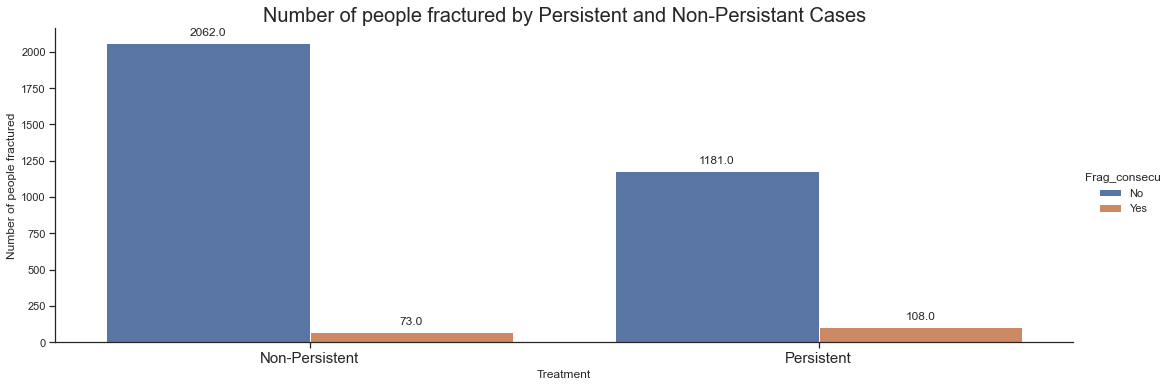

In [107]:
df_ge = df_g.groupby(['Frag_consecu','Persistency_Flag'],as_index=False).count()
fg = seaborn.catplot(x='Persistency_Flag', y='tscore_dis', hue='Frag_consecu', data=df_ge, kind='bar',aspect=3)
fg.set_xlabels('Treatment')
fg.set_ylabels('Number of people fractured')
#fg.set_xticklabels(rotation=90)
fg.set_xticklabels(fontsize=15)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                    va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
ax.set_title("Number of people fractured by Persistent and Non-Persistant Cases", fontsize=20)
plt.show()

Of the total number of patients, 8.38% of people were affected by the treatment, weakening their bones

### What is the proportion of patients who were affected by the treatment, decreasing their t-score?

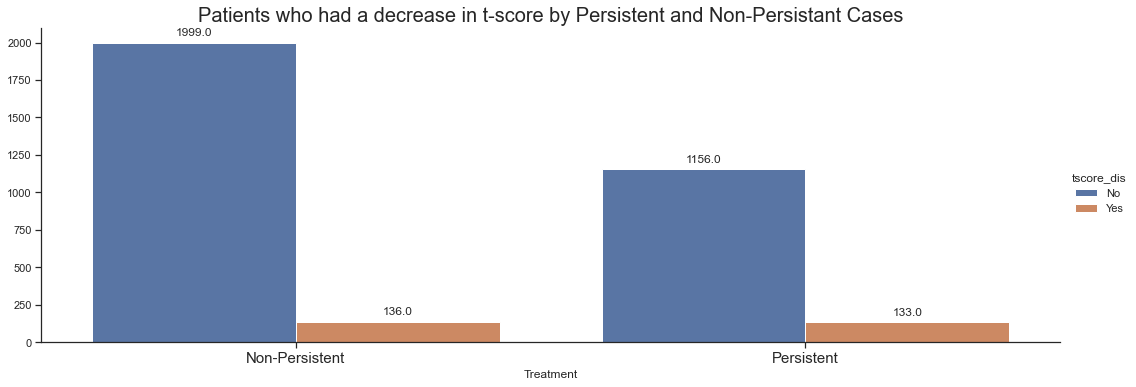

In [111]:
df_ge = df_g.groupby(['tscore_dis','Persistency_Flag'],as_index=False).count()
fg = seaborn.catplot(x='Persistency_Flag', y='Frag_consecu', hue='tscore_dis', data=df_ge, kind='bar',aspect=3)
fg.set_xlabels('Treatment')
fg.set_ylabels('')
#fg.set_xticklabels(rotation=90)
fg.set_xticklabels(fontsize=15)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                    va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
ax.set_title("Patients who had a decrease in t-score by Persistent and Non-Persistant Cases", fontsize=20)
plt.show()

There is 10.31% of people with treatment who had a decrease in the t-score

### Does the speciality of the person who prescribed the drug have any effect on the persistent rate?

Going to graph two graphs. First graph will show the distribution of specialities for presistent cases. The second with show the distribution of specialities for non presistent cases. 

In [15]:
# function displays the % and # labeling for each piece of the pie

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

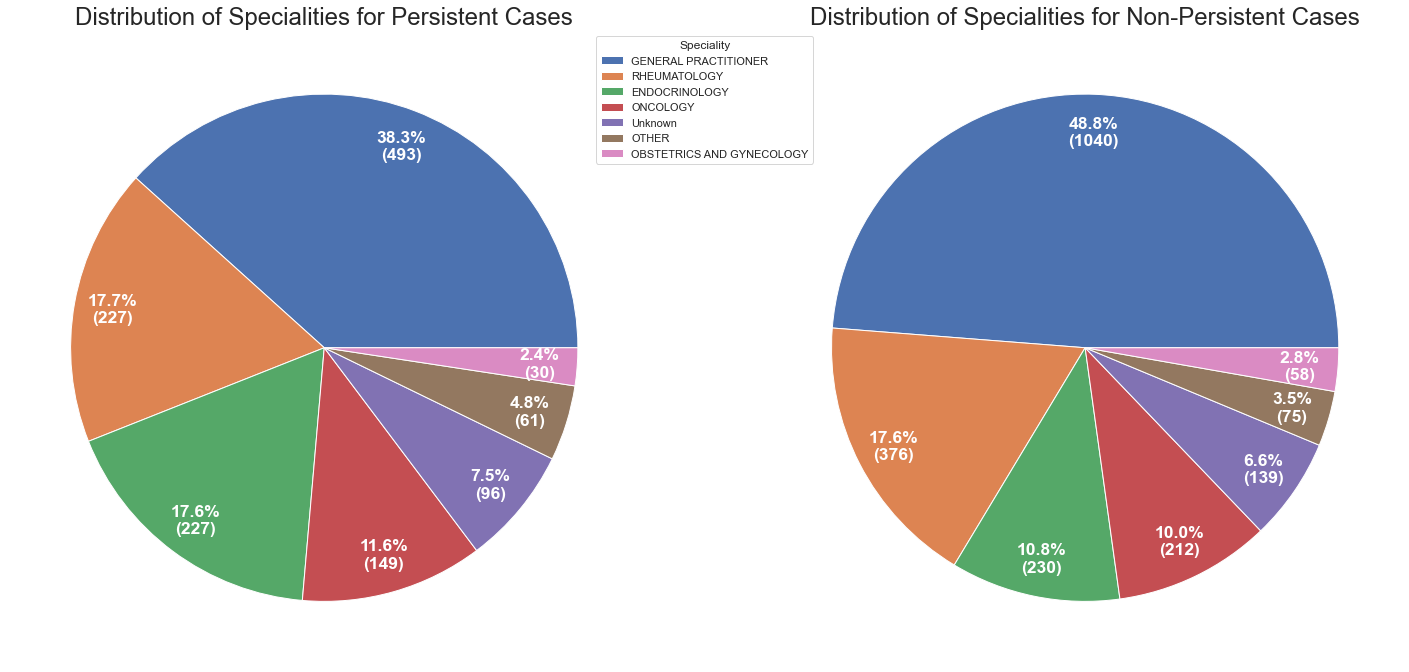

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (25,25), subplot_kw= dict(aspect= "equal"))

persistent_data = df[df.Persistency_Flag == "Persistent"]["Ntm_Speciality"]
non_persistent_data = df[df.Persistency_Flag == "Non-Persistent"]["Ntm_Speciality"]

per_spec = persistent_data.value_counts().values.tolist()
per_spec_label = persistent_data.value_counts().index.tolist()
non_per_spec = non_persistent_data.value_counts().values.tolist()
non_per_spec_label = non_persistent_data.value_counts().index.tolist()

wedges, texts, autotexts1 = ax1.pie(
    per_spec,
    autopct= lambda pct: func(pct, per_spec),
    textprops= dict(color= "w"),
    pctdistance=0.85
)

wedges, texts, autotexts2 = ax2.pie(
    non_per_spec,
    autopct= lambda pct: func(pct, non_per_spec),
    textprops= dict(color= "w"),
    pctdistance=0.85
)

ax1.legend(
    wedges,
    per_spec_label,
    title= "Speciality",
    loc= "upper center",
    bbox_to_anchor= (0.85, 0, 0.5, 1)
)

plt.setp(autotexts1, size= 17.5, weight= "bold")
plt.setp(autotexts2, size= 17.5, weight= "bold")


ax1.set_title("Distribution of Specialities for Persistent Cases", fontsize=24)
ax2.set_title("Distribution of Specialities for Non-Persistent Cases", fontsize=24)

plt.show()

We see that both pie charts are pretty similar in distribution of frequency for each speciality. Thus, we can rule out the possibly that one of the factors that the drug is persistent or not is the speciality that perscribed the drug in the first place. 

### Does 'Ntm_Specialist_Flag'  and 'Ntm_Speciality_Bucket' variables have useful information for the classificacion task?

In [90]:
# Distribution of the target variable by each variable analized will be shown

pd.crosstab(df.Ntm_Specialist_Flag, df.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Ntm_Specialist_Flag,,
Others,0.680079,0.319921
Specialist,0.542877,0.457123


In [91]:
pd.crosstab(df.Ntm_Speciality_Bucket, df.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Ntm_Speciality_Bucket,,
Endo/Onc/Uro,0.460894,0.539106
OB/GYN/Others/PCP/Unknown,0.679183,0.320817
Rheum,0.622517,0.377483


It seems Rheum flag in Ntm_Speciality_Bucket have some useful information

### What about 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx'?

In [92]:
pd.crosstab(df.Gluco_Record_Prior_Ntm, df.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Gluco_Record_Prior_Ntm,,
0,0.621993,0.378007
1,0.628571,0.371429


In [93]:
pd.crosstab(df.Gluco_Record_During_Rx, df.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Gluco_Record_During_Rx,,
0,0.68517,0.31483
1,0.45122,0.54878


Gluco_Record_During_Rx seems to be more useful than Gluco_Record_Prior_Ntm to predict the target.

### and about  'Dexa_Freq_During_Rx',  'Dexa_During_Rx'  and 'Frag_Frac_Prior_Ntm' variables ?

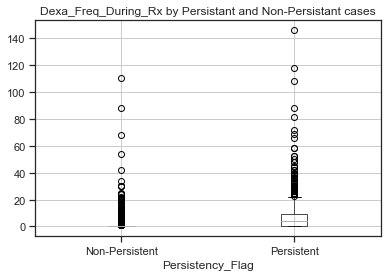

In [113]:
df.boxplot(column='Dexa_Freq_During_Rx', by = 'Persistency_Flag')
title_boxplot = 'Dexa_Freq_During_Rx by Persistant and Non-Persistant cases'
plt.title( title_boxplot )
plt.suptitle('')
plt.show()

The distribution of Dexa_Freq_During_Rx numbers seems to be higher in the Persistent patients

In [97]:
pd.crosstab(df.Dexa_During_Rx, df.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Dexa_During_Rx,,
0,0.769695,0.230305
1,0.235043,0.764957


In [98]:
pd.crosstab(df.Frag_Frac_Prior_Ntm, df.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Frag_Frac_Prior_Ntm,,
0,0.623607,0.376393
1,0.623188,0.376812


Varibles that are recorded during the treatment have more useful information for the classfication than others. It can be checked
with the percentajes shown by Dexa_During_Rx variable.

### Does the gender play a role in the chances of a drug being persistent or not?

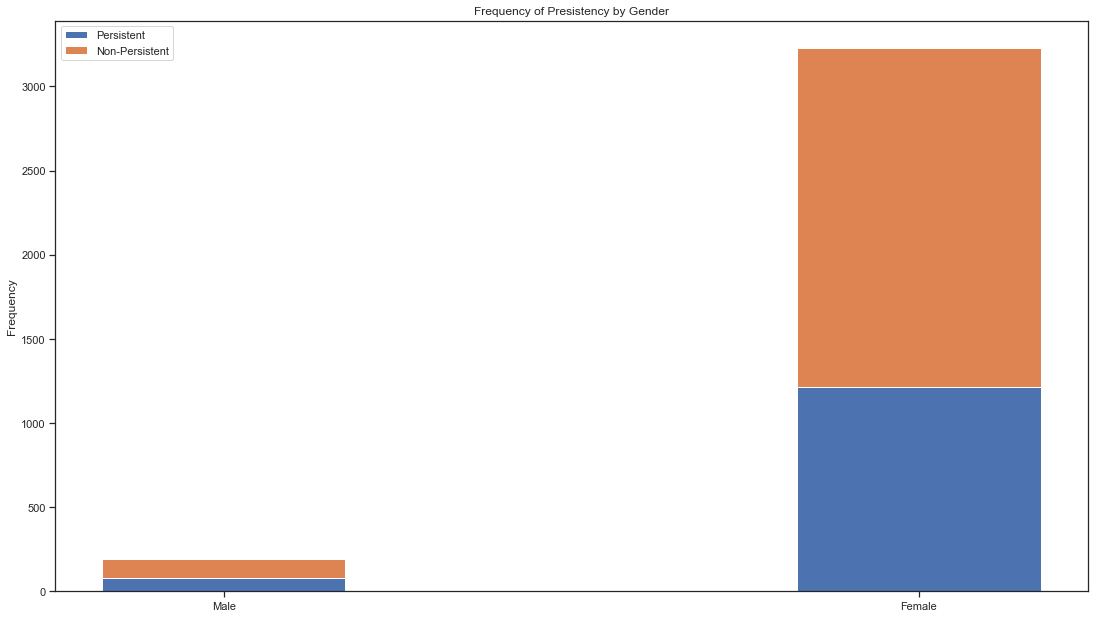

In [78]:
male_data = df[df.Gender == "Male"]
female_data = df[df.Gender == "Female"]

labels = ["Male", "Female"]
per_counts = [
    male_data["Persistency_Flag"].value_counts().values.tolist()[1],
    female_data["Persistency_Flag"].value_counts().values.tolist()[1]
]
non_per_counts = [
    male_data["Persistency_Flag"].value_counts().values.tolist()[0],
    female_data["Persistency_Flag"].value_counts().values.tolist()[0]
]

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)

ax.bar(labels, per_counts, width= 0.35, label= "Persistent")
ax.bar(labels, non_per_counts, width= 0.35, bottom= per_counts, label= "Non-Persistent")

ax.set_ylabel("Frequency")
ax.set_title("Frequency of Presistency by Gender")
ax.legend()

plt.show()

60.31% of males are flagged as non-persistent. <br />
62.48% of females are flagged as non-persistent. <br />

Seems about the same, which tells us both genders are experiencing the results from the drug when it comes to the persistency. 